# Combining top-down and bottom-up approaches to evaluate recent trends and seasonal patters in U.K. N2O emissions
## 3.1 Emissions and trends in N$_2$O (2013-2022)
----
Jupyter Notebook presenting the analysis used for producing results and figures in Section 3.1 of the paper. To run the notebook, please ensure the paths to the datasets are accordingly ammended. 

----
**Created:** 24 August 2023

**Authors:** Eric Saboya$^{1}$, Alistair J. Manning$^{2}$, Peter Levy$^{3}$, et al. 

**Affiliations:**

$^{1}$: School of Geographical Sciences, University of Bristol, UK

$^{2}$: Met Office Hadley Centre, Exeter, UK

$^{3}$: UK Centre for Ecology and Hydrology, Edinburgh, UK

**Contact:** eric.saboya[at]bristol.ac.uk

---  

In [1]:
import os 
import numpy as np
import xarray as xr
import datetime as dt
import scipy.stats as stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import matplotlib.dates as mdates
import matplotlib.text as text

from matplotlib import ticker
from matplotlib import gridspec
from matplotlib import rcParams
from matplotlib.lines import Line2D

# Update matplotlib plotting parameters 
def update_rcParams(key, val):
    if key in rcParams:
        rcParams[key] = val

update_rcParams('font.size', 12)
update_rcParams('font.family', 'serif')
update_rcParams('xtick.major.size', 8)
update_rcParams('xtick.labelsize', 'large')
update_rcParams('xtick.direction', "in")
update_rcParams('xtick.minor.visible', True) #
update_rcParams('xtick.top', True) #
update_rcParams('ytick.major.size', 8)
update_rcParams('ytick.labelsize', 'large')
update_rcParams('ytick.direction', "in")
update_rcParams('ytick.minor.visible', False) #
update_rcParams('ytick.right', True) # 
update_rcParams('xtick.minor.size', 4)
update_rcParams('ytick.minor.size', 4)
update_rcParams('xtick.major.pad', 10)
update_rcParams('ytick.major.pad', 10)
update_rcParams('legend.numpoints', 1)
#update_rcParams('use.tex',True)

mpl.rcParams['axes.linewidth'] = 2.2

### Colour palette used for figures.

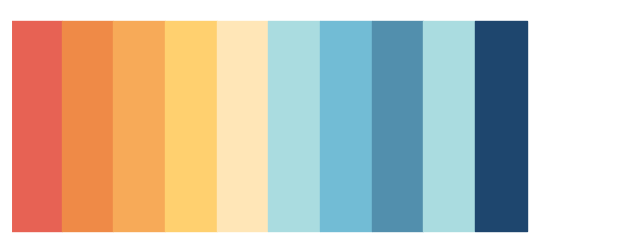

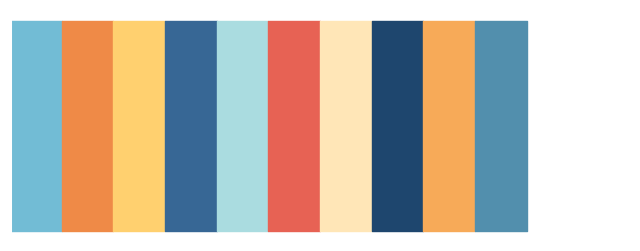

In [2]:

color_palette = {'6': "#e76254",
                 '2': "#ef8a47",
                 '9': "#f7aa58",
                 '3': "#ffd06f",
                 '7': "#ffe6b7",
                 '5': "#aadce0",
                 '1': "#72bcd5",
                 '10': "#528fad",
                 '4': "#376795",
                 '8': "#1e466e"}

fig, ax = plt.subplots(figsize=(8,3))
ax.fill_between(np.linspace(0,1), 0, 1, color=color_palette['6'])
ax.fill_between(np.linspace(1,2), 0, 1, color=color_palette['2'])
ax.fill_between(np.linspace(2,3), 0, 1, color=color_palette['9'])
ax.fill_between(np.linspace(3,4), 0, 1, color=color_palette['3'])
ax.fill_between(np.linspace(4,5), 0, 1, color=color_palette['7'])
ax.fill_between(np.linspace(5,6), 0, 1, color=color_palette['5'])
ax.fill_between(np.linspace(6,7), 0, 1, color=color_palette['1'])
ax.fill_between(np.linspace(7,8), 0, 1, color=color_palette['10'])
ax.fill_between(np.linspace(8,9), 0, 1, color=color_palette['5'])
ax.fill_between(np.linspace(9,10), 0, 1, color=color_palette['8'])

ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['bottom'].set_color('white')

ax.set_yticks([])
ax.set_xticks([])

ax.set_xlim((0,12))

plt.show()

fig, ax = plt.subplots(figsize=(8,3))
ax.fill_between(np.linspace(0,1), 0, 1, color=color_palette['1'])
ax.fill_between(np.linspace(1,2), 0, 1, color=color_palette['2'])
ax.fill_between(np.linspace(2,3), 0, 1, color=color_palette['3'])
ax.fill_between(np.linspace(3,4), 0, 1, color=color_palette['4'])
ax.fill_between(np.linspace(4,5), 0, 1, color=color_palette['5'])
ax.fill_between(np.linspace(5,6), 0, 1, color=color_palette['6'])
ax.fill_between(np.linspace(6,7), 0, 1, color=color_palette['7'])
ax.fill_between(np.linspace(7,8), 0, 1, color=color_palette['8'])
ax.fill_between(np.linspace(8,9), 0, 1, color=color_palette['9'])
ax.fill_between(np.linspace(9,10), 0, 1, color=color_palette['10'])

ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['bottom'].set_color('white')

ax.set_yticks([])
ax.set_xticks([])

ax.set_xlim((0,12))

plt.show()

### Read in data files
These data files contain the aggregated emissions totals for each period of inference for the UK (land only and land + sea regions)

In [31]:
# Change file paths accordingly
intem_mnthly = xr.open_dataset(os.path.join("/user/work/wz22079/projects/N2O/data/intem-basis100-20122022.nc"))
intem_yrly = xr.open_dataset(os.path.join("/group/chemistry/acrg/ES/","flux_MetOffice-InTEM_n2o_MHD_TAC_RGL_HFD_BSD_2012-2022_Aug2023_annualPrior.nc"))
rhime_mnthly = xr.open_dataset(os.path.join("/user/work/wz22079/projects/N2O/data/RHIME_UK_N2O_2013-2022.nc"))
rhime_yrly = xr.open_dataset(os.path.join("/user/work/wz22079/projects/N2O/data/RHIME_UK_N2O_2013-2022_ANNUAL.nc"))

In [33]:
rhime_yrly['uk-posterior-68-land']

<xarray.DataArray 'uk-posterior-68-land' (time: 120, n: 2)>
array([[7.216669e+10, 1.084772e+11],
       [6.475319e+10, 8.993757e+10],
       [1.010418e+11, 1.380748e+11],
       ...,
       [7.253435e+10, 1.015633e+11],
       [7.447544e+10, 1.009878e+11],
       [7.381094e+10, 1.037170e+11]])
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 2013-02-01 ... 2022-12-01
  * n        (n) int64 0 1

## Figure 3: Time series of monthly inferred posterior and prior emissions (2013-2022)
Notes:
1. InTEM posterior emissions run from 2012 to 2022. The period of interest is 2013 onwards, we therefore exclude the first 12 data points that correpsond to 2012 
2. We apply a multiplicative factor of 1e-9 to the Bristol-MCMC posterior emissions to convert them from g N2O yr$^{-1}$ to Gg N2O yr$^{-1}$

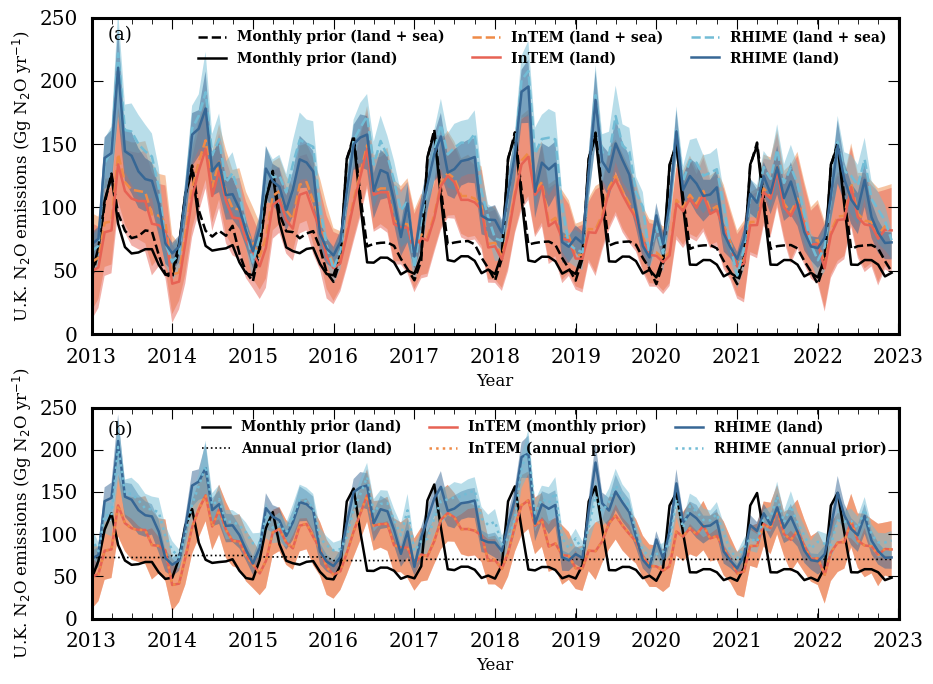

In [35]:
fig, ax = plt.subplots(2, 1, figsize=(9.5, 7), gridspec_kw={'height_ratios': [1.5, 1]})

# UPPER PANEL: land and land+sea contributions derived using monthly ukghg priors
# ____ a priori emissions ____
ax[0].plot(rhime_mnthly['time'], np.array(rhime_mnthly['uk-prior-landsea'])/1e9, '--', lw=1.8, color='k', label='Monthly prior (land + sea)')
ax[0].plot(rhime_mnthly['time'], np.array(rhime_mnthly['uk-prior-land'])/1e9, '-', lw=1.8, color='k', label='Monthly prior (land)')

# ____ INTEM posterior ____
# land + sea
ax[0].plot(intem_mnthly['time'][12::], intem_mnthly['uk-posterior-mu-landsea'][12::], '--', lw=1.8, color=color_palette['2'], label='InTEM (land + sea)')
ax[0].fill_between(intem_mnthly['time'][12::], 
                   intem_mnthly['uk-posterior-mu-landsea'][12::]-intem_mnthly['uk-posterior-68-landsea'][12::], 
                   intem_mnthly['uk-posterior-mu-landsea'][12::]+intem_mnthly['uk-posterior-68-landsea'][12::], 
                   facecolor=color_palette['2'], edgecolor=None, alpha=0.5, zorder=0)
# land
ax[0].plot(intem_mnthly['time'][12::], intem_mnthly['uk-posterior-mu-land'][12::], '-', lw=1.8, color=color_palette['6'], label='InTEM (land)')
ax[0].fill_between(intem_mnthly['time'][12::], 
                   intem_mnthly['uk-posterior-mu-land'][12::]-intem_mnthly['uk-posterior-68-land'][12::], 
                   intem_mnthly['uk-posterior-mu-land'][12::]+intem_mnthly['uk-posterior-68-land'][12::], 
                   facecolor=color_palette['6'], edgecolor=None, alpha=0.5, zorder=0)


# ____ RHIME, Monthly____
# ____ local filter, 193 scaling regions ____
# land + sea
ax[0].plot(rhime_mnthly['time'], np.array(rhime_mnthly['uk-posterior-mean-landsea'])/1e9, '--', lw=1.8, color=color_palette['1'], label='RHIME (land + sea)')
ax[0].fill_between(rhime_mnthly['time'], rhime_mnthly['uk-posterior-68-landsea'].values[:,0]/1e9, rhime_mnthly['uk-posterior-68-landsea'].values[:,1]/1e9, 
                   facecolor=color_palette['1'], edgecolor=None, alpha=0.5)
# land
ax[0].plot(rhime_mnthly['time'], np.array(rhime_mnthly['uk-posterior-mean-land'])/1e9, '-', lw=1.8, color=color_palette['4'], label='RHIME (land)')
ax[0].fill_between(rhime_mnthly['time'], rhime_mnthly['uk-posterior-68-land'].values[:,0]/1e9, rhime_mnthly['uk-posterior-68-land'].values[:,1]/1e9,
                   facecolor=color_palette['4'], edgecolor=None, alpha=0.5)


# ____ Add labels and limits etc. ____
ax[0].legend(ncol=3, fancybox=False, frameon=False,prop={'weight':'bold', 'size':'small'}, markerscale=1.5)
ax[0].set_ylim((0, 250))
ax[0].set_ylabel(r'U.K. N$_{2}$O emissions (Gg N$_{2}$O yr$^{-1}$)')
ax[0].set_xlim((dt.datetime(2013,1,1), dt.datetime(2023,1,3)))
ax[0].set_xlabel('Year')
ax[0].text(0.02, 0.93,'(a)', transform=ax[0].transAxes, fontsize=13)

# --------------------------------------------------------------------------------------------------------------------------------
# LOWER PANEL: land+sea contributions derived using annual and monthly ukghg priors
# --------------------------------------------------------------------------------------------------------------------------------
# ____ priors ____
ax[1].plot(rhime_mnthly['time'], np.array(rhime_mnthly['uk-prior-land'])/1e9, '-', lw=1.8, color='k', label='Monthly prior (land)')
ax[1].plot(intem_yrly['time'].values[12::], intem_yrly['country_prior_mean'].values[0, 12:] * 1e3, ':', lw=1.2, color='k', label='Annual prior (land)')


# ____ InTEM monthly priors ____
ax[1].plot(intem_mnthly['time'][12::], intem_mnthly['uk-posterior-mu-land'][12::], '-', lw=1.8, color=color_palette['6'], label='InTEM (monthly prior)')
ax[1].fill_between(intem_mnthly['time'][12::], 
                   intem_mnthly['uk-posterior-mu-land'][12::]-intem_mnthly['uk-posterior-68-land'][12::], 
                   intem_mnthly['uk-posterior-mu-land'][12::]+intem_mnthly['uk-posterior-68-land'][12::], 
                   facecolor=color_palette['6'], edgecolor=None, alpha=0.5)

# ____ InTEM annual priors ____
ax[1].plot(intem_yrly['time'][12::], intem_yrly['country_post_mean'].values[0,12:] * 1e3, ':', lw=1.8, color=color_palette['2'], label='InTEM (annual prior)')
ax[1].fill_between(intem_yrly['time'].values[12::], 
                   (intem_yrly['country_post_mean'].values[0,12:] - intem_yrly['country_post_std'].values[0,12:]) * 1e3, 
                   (intem_yrly['country_post_mean'].values[0,12:] + intem_yrly['country_post_std'].values[0,12:]) * 1e3, 
                   facecolor=color_palette['2'], edgecolor=None, alpha=0.5)

# ____ RHIME monthly priors ____
ax[1].plot(rhime_mnthly['time'], np.array(rhime_mnthly['uk-posterior-mean-land'])/1e9, '-', lw=1.8, color=color_palette['4'], label='RHIME (land)')
ax[1].fill_between(rhime_mnthly['time'], rhime_mnthly['uk-posterior-68-land'].values[:,0]/1e9, rhime_mnthly['uk-posterior-68-land'].values[:,1]/1e9,
                   facecolor=color_palette['4'], edgecolor=None, alpha=0.5)


# ____ RHIME, Annual priors ____
ax[1].plot(rhime_yrly['time'], np.array(rhime_yrly['uk-posterior-mean-land'])/1e9, ':', lw=1.8, color=color_palette['1'], label='RHIME (annual prior)')
ax[1].fill_between(rhime_yrly['time'], rhime_yrly['uk-posterior-68-land'].values[:,0]/1e9, rhime_yrly['uk-posterior-68-land'].values[:,1]/1e9,
                   facecolor=color_palette['1'], edgecolor=None, alpha=0.5)

# ____ Add labels and limits etc. ____
ax[1].legend(ncol=3, fancybox=False, frameon=False, prop={'weight':'bold', 'size':'small'}, markerscale=1.5)
ax[1].set_ylim((0, 250))
ax[1].set_ylabel(r'U.K. N$_{2}$O emissions (Gg N$_{2}$O yr$^{-1}$)')
ax[1].set_xlim((dt.datetime(2013,1,1), dt.datetime(2023,1,3)))
ax[1].set_xlabel('Year')
ax[1].text(0.02, 0.87,'(b)', transform=ax[1].transAxes, fontsize=13)

fig.tight_layout()
plt.savefig('../fig_paper/timeseries.jpg', dpi=300)
# plt.show()

**Figure 3:** *Time series of a priori and posterior monthly emissions. (a) Mean monthly inferred posterior emissions from InTEM (red) and RHIME (blue) for the land component of the U.K. (solid line) and the land and surrounding seas of the U.K. (dashed line) with correpsonding monthly a priori emissions in black. (b) Comparison of InTEM and RHIME posterior emissions derived using a priori emissions that include a seasonal cycle (solid line) and a priori emissions that are constant for each year (dotted line). Shaded regions correpsond to the 68% confidence interval range.*

#### Calculate average emissions over 2013-2022
Calculate average emissions for each set of posterior emissions and a priori emissions for land, sea, and land+sea regions of the U.K.

In [36]:
print("MEAN U.K. EMISSIONS USING MONTHLY PRIOR (w/ SEASONAL CYCLE)")
print("===========================================================")
print("Mean + stdev a priori emissions (Gg N2O / yr)")
print("    land+sea", np.mean(np.array(rhime_mnthly['uk-prior-landsea'])/1e9), np.std(np.array(rhime_mnthly['uk-prior-landsea'])/1e9))
print("    land", np.mean(np.array(rhime_mnthly['uk-prior-land'])/1e9), np.std(np.array(rhime_mnthly['uk-prior-land'])/1e9))
print("    sea", np.mean(np.array(rhime_mnthly['uk-prior-landsea'])-np.array(rhime_mnthly['uk-prior-land']))/1e9, np.std(np.array(rhime_mnthly['uk-prior-landsea'])-np.array(rhime_mnthly['uk-prior-land']))/1e9)
print("--------------------------------------------")
print("Mean + stdev InTEM posterior emissions (Gg N2O / yr)")
print("    land+sea", np.mean(intem_mnthly['uk-posterior-mu-landsea'].values[12::]), np.std(intem_mnthly['uk-posterior-mu-landsea'].values[12::]))
print("    land", np.mean(intem_mnthly['uk-posterior-mu-land'].values[12::]), np.std(intem_mnthly['uk-posterior-mu-land'].values[12::]))
print("    sea", np.mean(intem_mnthly['uk-posterior-mu-landsea'].values[12::]-intem_mnthly['uk-posterior-mu-land'].values[12::]), np.std(intem_mnthly['uk-posterior-mu-landsea'].values[12::]-intem_mnthly['uk-posterior-mu-land'].values[12::]))
print("--------------------------------------------")
print("Mean + stdev RHIME posterior emissions (Gg N2O / yr)")
print("    land+sea", np.mean(np.array(rhime_mnthly['uk-posterior-mean-landsea'])/1e9), np.std(np.array(rhime_mnthly['uk-posterior-mean-landsea'])/1e9))
print("    land", np.mean(np.array(rhime_mnthly['uk-posterior-mean-land'])/1e9), np.std(np.array(rhime_mnthly['uk-posterior-mean-land'])/1e9))
print("    sea", np.mean(np.array(rhime_mnthly['uk-posterior-mean-landsea'])-np.array(rhime_mnthly['uk-posterior-mean-land']))/1e9, np.std(np.array(rhime_mnthly['uk-posterior-mean-landsea'])-np.array(rhime_mnthly['uk-posterior-mean-land']))/1e9)
print("--------------------------------------------")

MEAN U.K. EMISSIONS USING MONTHLY PRIOR (w/ SEASONAL CYCLE)
Mean + stdev a priori emissions (Gg N2O / yr)
    land+sea 80.07172444583821 30.836903159934078
    land 73.68775864173061 31.867987326987453
    sea 6.383965804107618 6.899780913457131
--------------------------------------------
Mean + stdev InTEM posterior emissions (Gg N2O / yr)
    land+sea 94.65583333333333 23.07934789602071
    land 90.48166666666665 23.008060121521666
    sea 4.174166666666666 2.144314025251173
--------------------------------------------
Mean + stdev RHIME posterior emissions (Gg N2O / yr)
    land+sea 119.80892391557936 37.14647922601938
    land 111.72001261145664 32.12419333854481
    sea 8.08891130412272 10.470517940255455
--------------------------------------------


In [38]:
print("MEAN U.K. EMISSIONS USING YEARLY PRIOR (w/o SEASONAL CYCLE)")
print("===========================================================")
print("Mean a priori emissions (Gg N2O / yr)")
print("    land+sea", np.mean(np.array(rhime_yrly['uk-prior-landsea'])/1e9), np.std(np.array(rhime_yrly['uk-prior-landsea'])/1e9))
print("    land", np.mean(np.array(rhime_yrly['uk-prior-land'])/1e9), np.std(np.array(rhime_yrly['uk-prior-land'])/1e9))
print("    sea", np.mean(np.array(rhime_yrly['uk-prior-landsea'])-np.array(rhime_mnthly['uk-prior-land']))/1e9, np.std(np.array(rhime_yrly['uk-prior-landsea'])-np.array(rhime_mnthly['uk-prior-land']))/1e9)
print("--------------------------------------------")
print("Mean InTEM posterior emissions (Gg N2O / yr)")
print("    land+sea", np.mean(intem_yrly['country_post_mean'].values[1,12:]*1e3), np.std(intem_yrly['country_post_mean'].values[1,12:]*1e3))
print("    land", np.mean(intem_yrly['country_post_mean'].values[0,12:]*1e3), np.std(intem_yrly['country_post_mean'].values[0,12:]*1e3))
print("    sea", np.mean(intem_yrly['country_post_mean'].values[1,12:]*1e3-intem_yrly['country_post_mean'].values[0,12:]*1e3), np.std(intem_yrly['country_post_mean'].values[1,12:]*1e3-intem_yrly['country_post_mean'].values[0,12:]*1e3))
print("--------------------------------------------")
print("Mean RHIME posterior emissions (Gg N2O / yr)")
print("    land+sea", np.mean(np.array(rhime_yrly['uk-posterior-mean-landsea'])/1e9), np.std(np.array(rhime_yrly['uk-posterior-mean-landsea'])/1e9))
print("    land", np.mean(np.array(rhime_yrly['uk-posterior-mean-land'])/1e9), np.mean(np.array(rhime_yrly['uk-posterior-mean-land'])/1e9))
print("    sea", np.mean(np.array(rhime_yrly['uk-posterior-mean-landsea'])-np.array(rhime_mnthly['uk-posterior-mean-land']))/1e9, np.std(np.array(rhime_yrly['uk-posterior-mean-landsea'])-np.array(rhime_mnthly['uk-posterior-mean-land']))/1e9)
print("--------------------------------------------")

MEAN U.K. EMISSIONS USING YEARLY PRIOR (w/o SEASONAL CYCLE)
Mean a priori emissions (Gg N2O / yr)
    land-sea 84.04540439551693 1.8691033806171418
    land 76.42131869084896 1.7097988127555703
    sea 10.357645753786352 31.860882390110564
--------------------------------------------
Mean InTEM posterior emissions (Gg N2O / yr)
    land-sea 94.67662 23.101133
    land 90.48373 23.019058
    sea 4.1928997 2.1602244
--------------------------------------------
Mean RHIME posterior emissions (Gg N2O / yr)
    land-sea 129.628718639233 36.041485284811515
    land 116.10989459928116 116.10989459928116
    sea 17.90870602777635 29.850132407672227
--------------------------------------------


#### Calculate average posterior-prior emissions (2013-2022)
Calculate the average posterior-prior U.K. emissions for land, sea and, land+sea regions

In [26]:
intem_sea = intem_mnthly['uk-posterior-mu-landsea'].values[12::]-intem_mnthly['uk-posterior-mu-land'].values[12::]
prior_sea = (np.array(rhime_mnthly['uk-prior-landsea'])-np.array(rhime_mnthly['uk-prior-land']))/1e9
rhime_sea = (np.array(rhime_mnthly['uk-posterior-mean-landsea']) - np.array(rhime_mnthly['uk-posterior-mean-land']))/1e9

intem_landsea = intem_mnthly['uk-posterior-mu-landsea'].values[12::]
prior_landsea = np.array(rhime_mnthly['uk-prior-landsea'])/1e9
rhime_landsea = np.array(rhime_mnthly['uk-posterior-mean-landsea'])/1e9

intem_land = intem_mnthly['uk-posterior-mu-land'].values[12::]
prior_land = np.array(rhime_mnthly['uk-prior-land'])/1e9
rhime_land = np.array(rhime_mnthly['uk-posterior-mean-land'])/1e9

print("POSTERIOR - PRIOR EMISSIONS USING MONTHLY PRIOR (w/ SEASONAL CYCLE)")
print("===================================================================")
print("Mean + stdev InTEM posterior - prior emissions (Gg N2O/yr)")
print("    land+sea", np.mean(intem_landsea - prior_landsea), np.std(intem_landsea - prior_landsea))
print("    land", np.mean(intem_land - prior_land), np.std(intem_land - prior_land))
print("    sea", np.mean(intem_sea - prior_sea), np.std(intem_sea - prior_sea))
print("----------------------------------------------------------")
print("Mean + stdev InTEM posterior - prior emissions (%)")
print("    land+sea", 100 * np.mean((intem_landsea-prior_landsea)/intem_landsea), 100 * np.std((intem_landsea-prior_landsea)/intem_landsea))
print("    land",  100 * np.mean((intem_land-prior_land)/intem_land), 100 * np.std((intem_land-prior_land)/intem_land))
print("    sea", 100 * np.mean((intem_sea-prior_sea)/intem_sea), 100 * np.std((intem_sea-prior_sea)/intem_sea))
print("----------------------------------------------------------")
print("Mean + stdev RHIME posterior - prior emissions (Gg N2O/yr)")
print("    land+sea", np.mean(rhime_landsea-prior_landsea), np.std(rhime_landsea-prior_landsea))
print("    land", np.mean(rhime_land-prior_land), np.std(rhime_land-prior_land))
print("    sea", np.mean(rhime_sea-prior_sea), np.std(rhime_sea-prior_sea))
print("----------------------------------------------------------")
print("Mean + stdev RHIME posterior - prior emissions (%)")
print("    land+sea", 100 * np.mean((rhime_landsea-prior_landsea)/rhime_landsea), 100 * np.std((rhime_landsea-prior_landsea)/rhime_landsea))
print("    land",  100 * np.mean((rhime_land-prior_land)/rhime_land), 100 * np.std((rhime_land-prior_land)/rhime_land))
print("    sea", 100 * np.mean((rhime_sea-prior_sea)/rhime_sea), 100 * np.std((rhime_sea-prior_sea)/rhime_sea))

POSTERIOR - PRIOR EMISSIONS USING MONTHLY PRIOR (w/ SEASONAL CYCLE)
Mean + stdev InTEM posterior - prior emissions (Gg N2O/yr)
    land-sea 14.584108887495116 33.382980075328526
    land 16.793908024936066 37.40275545446518
    sea -2.20979913744095 7.205202819856603
----------------------------------------------------------
Mean + stdev InTEM posterior - prior emissions (%)
    land-sea 12.705920442644997 35.37356110634996
    land 14.034257672898349 40.98982748412727
    sea -87.26590114111353 230.39501716071936
----------------------------------------------------------
Mean + stdev RHIME posterior - prior emissions (Gg N2O/yr)
    land-sea 39.73719946974115 34.418123299967576
    land 38.03225396972604 32.580121386567264
    sea 1.7049455000151041 4.334603636127195
----------------------------------------------------------
Mean + stdev RHIME posterior - prior emissions (%)
    land-sea 30.747997623331113 22.498223939947604
    land 32.65390375699039 23.119469387373933
    sea 29.604

In [39]:
# Annual prior
intem_sea = (intem_yrly['country_post_mean'].values[1,12:]-intem_yrly['country_post_mean'].values[0,12:])*1e3
prior_sea = (np.array(rhime_yrly['uk-prior-landsea'])-np.array(rhime_yrly['uk-prior-land']))/1e9
rhime_sea = (np.array(rhime_yrly['uk-posterior-mean-landsea']) - np.array(rhime_yrly['uk-posterior-mean-land']))/1e9

intem_landsea = intem_yrly['country_post_mean'].values[1,12:] * 1e3
prior_landsea = np.array(rhime_yrly['uk-prior-landsea'])/1e9
rhime_landsea = np.array(rhime_yrly['uk-posterior-mean-landsea'])/1e9

intem_land = intem_yrly['country_post_mean'].values[0,12:] * 1e3
prior_land = np.array(rhime_yrly['uk-prior-land'])/1e9
rhime_land = np.array(rhime_yrly['uk-posterior-mean-land'])/1e9


print("POSTERIOR - PRIOR EMISSIONS USING ANNUAL PRIOR (w/o SEASONAL CYCLE)")
print("===================================================================")
print("Mean InTEM posterior - prior emissions (Gg N2O/yr)")
print("    land+sea", np.mean(intem_landsea - prior_landsea), np.std(intem_landsea - prior_landsea))
print("    land", np.mean(intem_land - prior_land), np.std(intem_land - prior_land))
print("    sea", np.mean(intem_sea - prior_sea), np.std(intem_sea - prior_sea))
print("--------------------------------------------------")
print("Mean InTEM posterior - prior emissions (%)")
print("    land+sea", 100 * np.mean((intem_landsea-prior_landsea)/intem_landsea), 100 * np.std((intem_landsea-prior_landsea)/intem_landsea))
print("    land",  100 * np.mean((intem_land-prior_land)/intem_land), 100 * np.std((intem_land-prior_land)/intem_land))
print("    sea", 100 * np.mean((intem_sea-prior_sea)/intem_sea), 100 * np.std((intem_sea-prior_sea)/intem_sea))
print("--------------------------------------------------")
print("Mean RHIME posterior - prior emissions (Gg N2O/yr)")
print("    land+sea", np.mean(rhime_landsea-prior_landsea), np.std(rhime_landsea-prior_landsea))
print("    land", np.mean(rhime_land-prior_land), np.std(rhime_land-prior_land))
print("    sea", np.mean(rhime_sea-prior_sea), np.std(rhime_sea-prior_sea))
print("--------------------------------------------------")
print("Mean RHIME posterior - prior emissions (%)")
print("    land+sea", 100 * np.mean((rhime_landsea-prior_landsea)/rhime_landsea), 100 * np.std((rhime_landsea-prior_landsea)/rhime_landsea))
print("    land",  100 * np.mean((rhime_land-prior_land)/rhime_land), 100 * np.std((rhime_land-prior_land)/rhime_land))
print("    sea", 100 * np.mean((rhime_sea-prior_sea)/rhime_sea), 100 * np.std((rhime_sea-prior_sea)/rhime_sea))

POSTERIOR - PRIOR EMISSIONS USING ANNUAL PRIOR (w/o SEASONAL CYCLE)
Mean InTEM posterior - prior emissions (Gg N2O/yr)
    land-sea 10.631216596507787 22.89260125907767
    land 14.062402406461409 22.90116536331445
    sea -3.4311858218745495 1.9210532027078102
--------------------------------------------------
Mean InTEM posterior - prior emissions (%)
    land-sea 5.289631782466466 25.750660058724762
    land 9.14887914572145 26.926518863505105
    sea -120.04923695764742 74.40869272203854
--------------------------------------------------
Mean RHIME posterior - prior emissions (Gg N2O/yr)
    land-sea 45.58331424371604 35.66371274177043
    land 39.688575908432185 26.473198927818153
    sea 5.894738335283855 27.798025379268886
--------------------------------------------------
Mean RHIME posterior - prior emissions (%)
    land-sea 31.48946406336346 14.89203582886202
    land 30.742117675228382 15.545014749956279
    sea 23.74628950768682 16.10316980288366


In [40]:
# Calculate average absolute differences for each year (not detrended)
rhime_diff_landsea = (np.array(rhime_mnthly['uk-posterior-mean-landsea']) - np.array(rhime_mnthly['uk-prior-landsea']))/1e9
rhime_diff_land = (np.array(rhime_mnthly['uk-posterior-mean-land']) - np.array(rhime_mnthly['uk-prior-land']))/1e9

intem_diff_landsea = (intem_mnthly['uk-posterior-mu-landsea'][12::] - rhime_mnthly['uk-prior-landsea']/1e9)
intem_diff_land = (intem_mnthly['uk-posterior-mu-land'][12::] - rhime_mnthly['uk-prior-land']/1e9)

for i in range(0, len(intem_diff_land), 12):
    print("InTEM, land+sea",2013+i//12,np.median(np.abs(intem_diff_landsea[i:i+12])))
for i in range(0, len(intem_diff_land), 12):
    print("InTEM, land",2013+i//12,np.median(np.abs(intem_diff_land[i:i+12])))

for i in range(0, len(rhime_diff_land), 12):
    print("RHIME, land+sea",2013+i//12,np.median(np.abs(rhime_diff_landsea[i:i+12])))
for i in range(0, len(rhime_diff_land), 12):
    print("RHIME, land",2013+i//12,np.median(np.abs(rhime_diff_land[i:i+12])))

InTEM, landsea 2013 33.393094826590314
InTEM, landsea 2014 33.525253342264065
InTEM, landsea 2015 21.315348978504108
InTEM, landsea 2016 38.114767675807116
InTEM, landsea 2017 36.00652959427667
InTEM, landsea 2018 27.622163304503278
InTEM, landsea 2019 26.653252797838988
InTEM, landsea 2020 30.75664305162978
InTEM, landsea 2021 32.145528996604426
InTEM, landsea 2022 26.541475083967406
InTEM, land 2013 35.93712288346426
InTEM, land 2014 35.910412213752174
InTEM, land 2015 22.855697498960502
InTEM, land 2016 44.13997043786317
InTEM, land 2017 45.37554593722565
InTEM, land 2018 29.530803402517574
InTEM, land 2019 36.37447517845696
InTEM, land 2020 40.30765980658735
InTEM, land 2021 41.07632799021549
InTEM, land 2022 30.799372019934463
RHIME, landsea 2013 56.146367738346854
RHIME, landsea 2014 41.960925861926256
RHIME, landsea 2015 30.31197736304508
RHIME, landsea 2016 52.07017653521392
RHIME, landsea 2017 51.45812823336636
RHIME, landsea 2018 54.82687758784803
RHIME, landsea 2019 35.04808

#### Calculate differences between posterior emissions
Calculaing the difference between RHIME and InTEM emissions 

In [41]:
print("Mean RHIME - InTEM posteriors (Gg N2O/yr)")
print("    land+sea", np.mean(np.array(rhime_mnthly['uk-posterior-mean-landsea'])/1e9 - intem_mnthly['uk-posterior-mu-landsea'].values[12::]))
print("    land+sea std", np.std(np.array(rhime_mnthly['uk-posterior-mean-landsea'])/1e9 - intem_mnthly['uk-posterior-mu-landsea'].values[12::]))
print("")
print("    land", np.mean(np.array(rhime_mnthly['uk-posterior-mean-land'])/1e9 - intem_mnthly['uk-posterior-mu-land'].values[12::]))
print("    land std", np.std(np.array(rhime_mnthly['uk-posterior-mean-land'])/1e9 - intem_mnthly['uk-posterior-mu-land'].values[12::]))
print("")
print("    sea", np.mean(rhime_sea - intem_sea))
print("    sea std", np.std(rhime_sea - intem_sea))

Mean RHIME - InTEM posteriors (Gg N2O/yr)
    land-sea 25.15309058224603
    land-sea std 20.722193876050632
    land 21.238345944789977
    land std 19.87932677141401
    sea 9.325924157158404


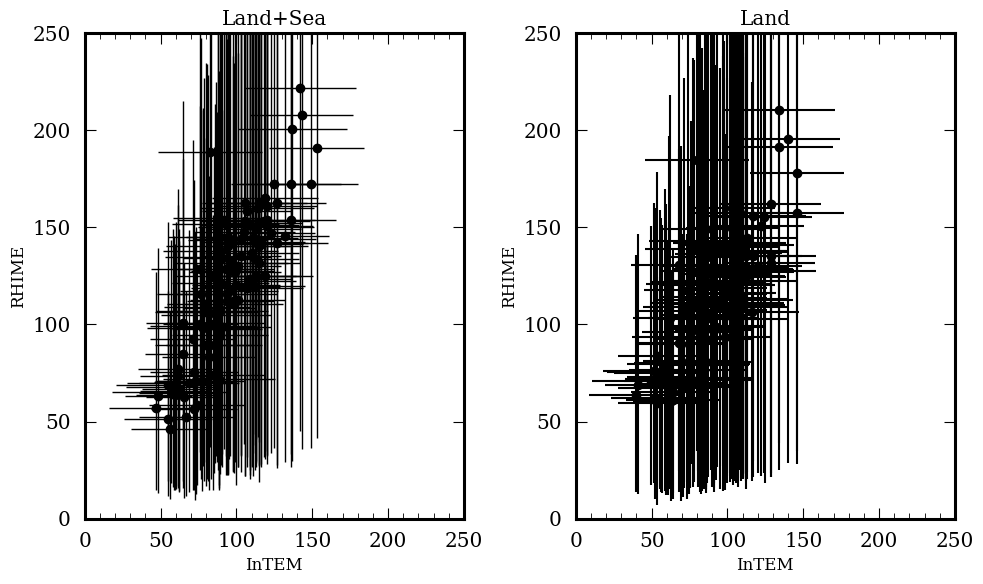

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw={'width_ratios': [1, 1]})

# ____ INTEM vs RHIME (land+sea) ____
# land + sea
ax[0].errorbar(intem_mnthly['uk-posterior-mu-landsea'][12::], 
               np.array(rhime_mnthly['uk-posterior-mean-landsea'])/1e9, 
               xerr=intem_mnthly['uk-posterior-68-landsea'][12::],  
               yerr=(rhime_mnthly['uk-posterior-68-landsea'].values[:,0]/1e9, rhime_mnthly['uk-posterior-68-landsea'].values[:,1]/1e9),
               fmt='o', color='k', lw=1.0)


ax[0].set_ylabel('RHIME')
ax[0].set_xlabel('InTEM')
ax[0].set_title('Land+Sea')
ax[0].set_ylim((0, 250))
ax[0].set_xlim((0, 250))

# land + sea
ax[1].errorbar(intem_mnthly['uk-posterior-mu-land'][12::], 
               np.array(rhime_mnthly['uk-posterior-mean-land'])/1e9, 
               xerr=intem_mnthly['uk-posterior-68-land'][12::],  
               yerr=(rhime_mnthly['uk-posterior-68-land'].values[:,0]/1e9, rhime_mnthly['uk-posterior-68-land'].values[:,1]/1e9),
               fmt='o', color='k')


ax[1].set_ylabel('RHIME')
ax[1].set_xlabel('InTEM')
ax[1].set_title('Land')
ax[1].set_ylim((0, 250))
ax[1].set_xlim((0, 250))

fig.tight_layout()
plt.show()

#### Calculate average proportion of land and sea emissions
Calculated for prior and posterior emissions (from monthly prior)

In [47]:
print("UKGHG prior")
print("    Sea",np.mean(prior_sea/prior_landsea)*100,"%")
print("    Land",np.mean(prior_land/prior_landsea)*100,"%")
print("InTEM")
print("    Sea",np.mean(intem_sea/intem_landsea)*100,"%")
print("    Land",np.mean(intem_land/intem_landsea)*100,"%")
print("RHIME")
print("    Sea",np.mean(rhime_sea/rhime_landsea)*100,"%")
print("    Land",np.mean(rhime_land/rhime_landsea)*100,"%")

UKGHG prior
    Sea 9.071263690421356 %
    Land 90.92873630957861 %
InTEM
    Sea 4.703526571393013 %
    Land 95.2964723110199 %
RHIME
    Sea 9.359725821154827 %
    Land 90.64027417884516 %


### Differences between posterior emissions (annual vs monthly)
Calculate average differences between posterior emissions derived using monthly vs. annual a priori emissions data

In [49]:
print("InTEM")
# print("land-sea", np.mean((intem_mnthly['uk-posterior-mu-landsea'].values[12::] - intem_yrly['country_post_mean'].values[1,12:] * 1e3)/intem_yrly['country_post_mean'].values[1,12:] * 1e3))
print("land", 100*np.mean((intem_mnthly['uk-posterior-mu-land'].values[12::] - intem_yrly['country_post_mean'].values[0,12:]*1e3)/(intem_yrly['country_post_mean'].values[0,12:]*1e3)), "%")

print("RHIME")
print("land", 100*np.mean((rhime_mnthly['uk-posterior-mean-land'].values-rhime_yrly['uk-posterior-mean-land'].values)/rhime_yrly['uk-posterior-mean-land'].values), "%")

InTEM
land -0.00014598109197160643 %
RHIME
land -4.469083265348348 %


In [50]:
# Calculate correlation coefficient between two sets of posterior emissions 
out_ls = stats.linregress(intem_mnthly['uk-posterior-mu-landsea'][12::], np.array(rhime_mnthly['uk-posterior-mean-landsea'])/1e9)
print('Land + Sea')
print(out_ls)
print()
out_l = stats.linregress(intem_mnthly['uk-posterior-mu-land'][12::], np.array(rhime_mnthly['uk-posterior-mean-land'])/1e9)
print('Land')
print(out_l)

Land + Sea
LinregressResult(slope=1.3921809439704362, intercept=-11.969123486728932, rvalue=0.8649710284682429, pvalue=3.905812823593323e-37, stderr=0.074353710232664, intercept_stderr=7.2441973477728885)

Land
LinregressResult(slope=1.1014462150278246, intercept=12.05932333204737, rvalue=0.7888802208638008, pvalue=1.0360938536071273e-26, stderr=0.07898894556118632, intercept_stderr=7.37449816203294)


### Calculate trend for 2013-2022
Calculate trend for inversion period by i) calculating annual emissions, ii) fitting with a weighted linear regression, iii) extrapolating current trend to 2030 to compare with U.Kprojections. Only considering the land component

In [51]:
# calculate no. of seconds per month 
seconds_in_month = []

for year in [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]:
    seconds_in_month.append((dt.datetime(year,2,1,0,0) - dt.datetime(year,1,1,0,0)).total_seconds())
    seconds_in_month.append((dt.datetime(year,3,1,0,0) - dt.datetime(year,2,1,0,0)).total_seconds())
    seconds_in_month.append((dt.datetime(year,4,1,0,0) - dt.datetime(year,3,1,0,0)).total_seconds())
    seconds_in_month.append((dt.datetime(year,5,1,0,0) - dt.datetime(year,4,1,0,0)).total_seconds())
    seconds_in_month.append((dt.datetime(year,6,1,0,0) - dt.datetime(year,5,1,0,0)).total_seconds())
    seconds_in_month.append((dt.datetime(year,7,1,0,0) - dt.datetime(year,6,1,0,0)).total_seconds())
    seconds_in_month.append((dt.datetime(year,8,1,0,0) - dt.datetime(year,7,1,0,0)).total_seconds())
    seconds_in_month.append((dt.datetime(year,9,1,0,0) - dt.datetime(year,8,1,0,0)).total_seconds())
    seconds_in_month.append((dt.datetime(year,10,1,0,0) - dt.datetime(year,9,1,0,0)).total_seconds())
    seconds_in_month.append((dt.datetime(year,11,1,0,0) - dt.datetime(year,10,1,0,0)).total_seconds())
    seconds_in_month.append((dt.datetime(year,12,1,0,0) - dt.datetime(year,11,1,0,0)).total_seconds())
    seconds_in_month.append((dt.datetime(year+1,1,1,0,0) - dt.datetime(year,12,1,0,0)).total_seconds())

In [52]:
# Convert monthly values from Gg/yr to Gg/month 
intem_post_mu_land = intem_mnthly['uk-posterior-mu-land'].values[12::] * np.array(seconds_in_month) / (3600*24*365.25)
intem_post_68_land = intem_mnthly['uk-posterior-68-land'].values[12::] 

rhime_post_mu_land = rhime_mnthly['uk-posterior-mean-land'].values * np.array(seconds_in_month) / (3600*24*365.25)
rhime_post_68_low_land = rhime_mnthly['uk-posterior-68-land'].values[:,0]
rhime_post_68_upp_land = rhime_mnthly['uk-posterior-68-land'].values[:,1]

# Calculate annual posterior values 
intem_post_mu_land_yr = []
intem_post_68_land_yr = []

rhime_post_mu_land_yr = []
rhime_post_68_low_land_yr = []
rhime_post_68_upp_land_yr = []


for i in range(0, len(rhime_post_mu_land), 12):
    rhime_post_mu_land_yr.append(sum(rhime_post_mu_land[i:i+12])/1e9)
    rhime_post_68_low_land_yr.append(np.median(rhime_post_68_low_land[i:i+12])/1e9)
    rhime_post_68_upp_land_yr.append(np.median(rhime_post_68_upp_land[i:i+12])/1e9)
    
    intem_post_mu_land_yr.append(sum(intem_post_mu_land[i:i+12]))
    intem_post_68_land_yr.append(np.median(intem_post_68_land[i:i+12]))

In [54]:
# ---------------------------------------------------------
# NAEI annual totals + projected emissions
# ---------------------------------------------------------
t_projections, n2o_ref, n2o_lowgdp, n2o_highgdp = np.genfromtxt('/user/work/wz22079/projects/N2O/data/n2o_naei_projections.csv',
                                                                unpack=True, 
                                                                delimiter=',',
                                                                skip_header=1, 
                                                                usecols=(0,1,2,3))

In [ ]:
import statsmodels.api as sm 
import scipy.stats as stats

x = np.arange(0, 10, 1)
x_trend = sm.add_constant(x)

# RHIME
fit = sm.OLS(np.array(rhime_post_mu_land_yr), x_trend).fit()
rhime262_fit_wls = sm.WLS(np.array(rhime_post_mu_land_yr), x_trend, weights=np.array(rhime_post_mu_land_yr)-np.array(rhime_post_68_low_land_yr)).fit()

# InTEM 
fit_intem = sm.OLS(np.array(intem_post_mu_land_yr), x_trend).fit()
intem_fit_wls = sm.WLS(np.array(intem_post_mu_land_yr), x_trend, weights=np.array(intem_post_mu_land_yr)-np.array(intem_post_68_land_yr)).fit()

In [57]:
print("RHIME trend: ", rhime262_fit_wls.params[1]/1, "Gg N2O/yr")
print("1 std uncert", np.sqrt(rhime262_fit_wls.cov_params()[1,1])/1)
print("InTEM trend: ", intem_fit_wls.params[1]/1, "Gg N2O/yr")
print("1 std uncert", np.sqrt(intem_fit_wls.cov_params()[1,1])/1)

RHIME trend:  -2.102352132266285 Gg N2O/yr
1 std uncert 0.7184638654014207
InTEM trend:  -0.6864469984613528 Gg N2O/yr
1 std uncert 0.49113519753453344


## Figure 4: InTEM and RHIME annual emissions along with U.K. reported emissions (NAEI) and projections


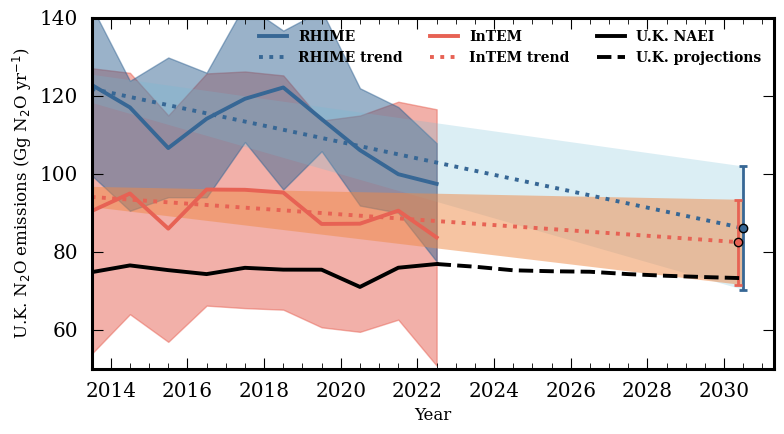

In [65]:
rhime_trend = (np.arange(0, 18, 1)*rhime262_fit_wls.params[1])+rhime262_fit_wls.params[0]
rhime_trend_upper = (np.arange(0, 18, 1)*(rhime262_fit_wls.params[1]+np.sqrt(rhime262_fit_wls.cov_params()[1,1])))+ (rhime262_fit_wls.params[0]+np.sqrt(rhime262_fit_wls.cov_params()[0,0]))
rhime_trend_lower = (np.arange(0, 18, 1)*(rhime262_fit_wls.params[1]-np.sqrt(rhime262_fit_wls.cov_params()[1,1])))+ (rhime262_fit_wls.params[0]-np.sqrt(rhime262_fit_wls.cov_params()[0,0]))

intem_trend_upper = (np.arange(0, 18, 1)*(intem_fit_wls.params[1]+np.sqrt(intem_fit_wls.cov_params()[1,1])))+ (intem_fit_wls.params[0]+np.sqrt(intem_fit_wls.cov_params()[0,0]))
intem_trend_lower = (np.arange(0, 18, 1)*(intem_fit_wls.params[1]-np.sqrt(intem_fit_wls.cov_params()[1,1])))+ (intem_fit_wls.params[0]-np.sqrt(intem_fit_wls.cov_params()[0,0]))
intem_trend = (np.arange(0, 18, 1)*intem_fit_wls.params[1])+intem_fit_wls.params[0]


# Plotting 
fig, ax = plt.subplots(figsize=(8,4.5))

# RHIME yearly posterior emissions 
ax.plot(np.arange(2013.5, 2023.5, 1), np.array(rhime_post_mu_land_yr), '-', color=color_palette['4'], lw=2.8, label='RHIME')
ax.fill_between(np.arange(2013.5, 2023.5, 1), np.array(rhime_post_68_low_land_yr), np.array(rhime_post_68_upp_land_yr), color=color_palette['4'], alpha=0.5)

ax.plot(np.arange(2013.5, 2031.5, 1), rhime_trend, ':', color=color_palette['4'], lw=2.8, label='RHIME trend')
ax.fill_between(np.arange(2013.5, 2031.5, 1), rhime_trend_lower, rhime_trend_upper, facecolor=color_palette['1'], lw=2.8, alpha=0.25)
ax.errorbar(2030.5, rhime_trend[17], yerr = np.array(rhime_trend[17]-rhime_trend_lower[17], rhime_trend_upper[17]-rhime_trend[17]).T, color=color_palette['4'], capsize=3, fmt='o', markeredgecolor='k', lw=2, capthick=2)


# InTEM yearly posterior emissions 
ax.plot(np.arange(2013.5, 2023.5, 1), np.array(intem_post_mu_land_yr), '-', color=color_palette['6'], lw=2.8, label='InTEM')
ax.fill_between(np.arange(2013.5, 2023.5, 1), (np.array(intem_post_mu_land_yr)-np.array(intem_post_68_land_yr)), 
                (np.array(intem_post_mu_land_yr)+np.array(intem_post_68_land_yr)),
                color=color_palette['6'], alpha=0.5, zorder=0)

ax.fill_between(np.arange(2013.5, 2031.5, 1), intem_trend_lower, intem_trend_upper, facecolor=color_palette['2'], lw=2, alpha=0.5)
ax.plot(np.arange(2013.5, 2031.5, 1), (np.arange(0, 18, 1)*intem_fit_wls.params[1])+intem_fit_wls.params[0], ':', color=color_palette['6'], lw=2.8, label='InTEM trend')
ax.errorbar(2030.35, intem_trend[17], yerr = np.array(intem_trend[17]-intem_trend_lower[17], intem_trend_upper[17]-intem_trend[17]).T, color=color_palette['6'], capsize=3, fmt='o', markeredgecolor='k', lw=2, capthick=2)


# NAEI emissions
ax.plot(t_projections[0:-8]+0.5, n2o_ref[0:-8] * 1e12/ 1e9 / 265, 'k-', label='U.K. NAEI', lw=2.8)
ax.plot(t_projections[-9::]+0.5, n2o_ref[-9::] * 1e12/ 1e9 / 265, 'k--', label='U.K. projections', lw=2.8)

# ax.plot(np.arange(2013, 2023, 1), prior_co2eq, 'k-', label='NAEI')
ax.set_xlim((2013.5,2031.3))
ax.set_ylim((50, 140))
ax.legend(fancybox=False, frameon=False,prop={'weight':'bold', 'size':'small'}, markerscale=1.5, ncol=3)
ax.set_ylabel(r'U.K. N$_{2}$O emissions (Gg N$_{2}$O yr$^{-1}$)')
ax.set_xlabel('Year')
# plt.show()
fig.tight_layout()

plt.savefig("../fig_paper/trends.jpg", dpi=300)

In [66]:
# P-values of fit 
print("RHIME",rhime262_fit_wls.pvalues)
print("InTEM",intem_fit_wls.pvalues)

RHIME [6.43891684e-10 1.91096732e-02]
InTEM [3.60334261e-10 1.99751346e-01]


In [67]:
print(intem_trend[17], intem_trend[17]-intem_trend_lower[17], intem_trend_upper[17]-intem_trend[17])
print(rhime_trend[17], rhime_trend[17]-rhime_trend_lower[17], rhime_trend_upper[17]-rhime_trend[17])

82.3242978554191 10.935819287205348 10.935819287205348
85.99566501442825 15.817451196302187 15.817451196302187
